In [1]:
import pandas as pd
from pandas import read_csv

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [48]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [93]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [80]:
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/datasets/finales/"
filename = "affluent_std copy.csv"
dataset = read_csv(folder + filename,parse_dates = ['hour'], index_col = ['hour'])
del dataset['index']
dataset.rename(columns = {'energy(kWh/hh)':'energy'}, inplace = True) 

In [81]:
dataset.head()

,energy,temperature,pressure,wind_speed,humidity,weekend
hour,,,,,,
2012-01-01 00:00:00,0.234250,13.49,1008.14,3.11,0.88,1
2012-01-01 00:30:00,0.213458,13.49,1008.14,3.11,0.88,1
2012-01-01 01:00:00,0.236750,12.73,1007.88,3.08,0.93,1
2012-01-01 01:30:00,0.207667,12.73,1007.88,3.08,0.93,1
2012-01-01 02:00:00,0.193708,13.65,1007.09,3.71,0.91,1


Data preprocessing

In [89]:
train = dataset[:32112]
test = dataset[32112:]
len(train),len(test)

(32112, 2928)

In [90]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [91]:
time_steps = 7

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.energy, time_steps)
X_test, y_test = create_dataset(test, test.energy, time_steps)

print(X_train.shape, y_train.shape)

(32105, 7, 6) (32105,)


Model

In [96]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae', 'mape'])

Training

Epoch 1/50
 - 4s - loss: 0.0626 - mse: 0.0066 - mae: 0.0626 - mape: 33.9768
Epoch 2/50
 - 4s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7614
Epoch 3/50
 - 4s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7917
Epoch 4/50
 - 4s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7699
Epoch 5/50
 - 4s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7581
Epoch 6/50
 - 4s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7664
Epoch 7/50
 - 6s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7675
Epoch 8/50
 - 9s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7419
Epoch 9/50
 - 7s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7386
Epoch 10/50
 - 5s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7367
Epoch 11/50
 - 5s - loss: 0.0624 - mse: 0.0065 - mae: 0.0624 - mape: 33.7449
Epoch 12/50
 - 6s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7406
Epoch 13/50
 - 5s - loss: 0.0624 - mse: 0.0066 - mae: 0.0624 - mape: 33.7559
Epoch 14

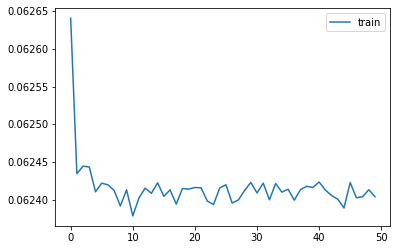

In [97]:
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=70, verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

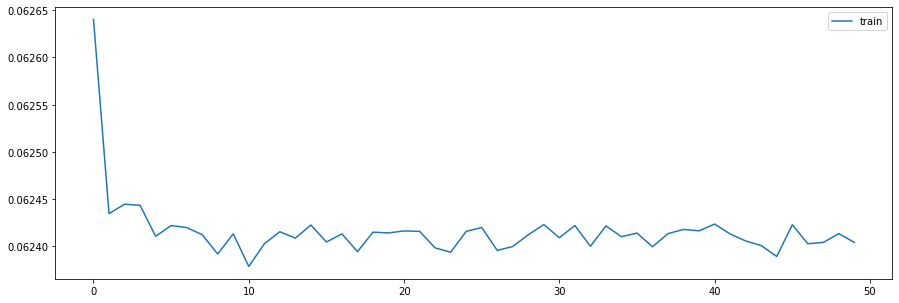

In [99]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label='train')
plt.legend();

In [100]:
y_pred = model.predict(X_test)

In [101]:
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

Test RMSE: 0.103
MAE 0.08480436219181825


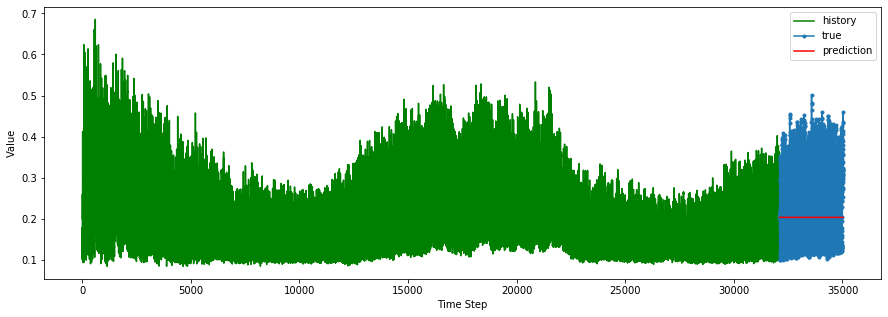

In [102]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

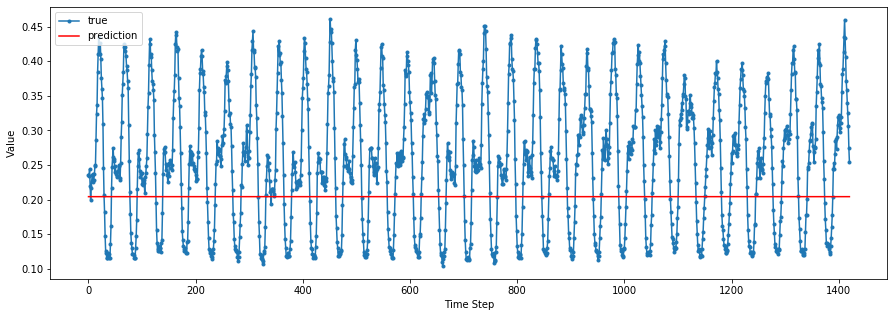

In [103]:
plt.figure(figsize=(15,5))
plt.plot(y_test[1500:], marker='.', label="true")
plt.plot(y_pred[1500:], 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();